# Import Packages

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statistics
import pandas as pd
import pandas_profiling
import plotly.graph_objects as go

# Load Dataset

In [7]:
netflix = pd.read_csv (r'C:/Users/Hanna Bohannon/Documents/DATA SCIENCE COURSE ORGANIZED/Assignments/Module 110 Independent Project/Datasets/netflix.csv')

In [4]:
netflix.head(10)

As of  Rank Year to Date Rank Last Week Rank  \
0  2020-04-01     1                 1              1   
1  2020-04-01     2                 2              -   
2  2020-04-01     3                 3              2   
3  2020-04-01     4                 4              -   
4  2020-04-01     5                 5              4   
5  2020-04-01     6                 6              -   
6  2020-04-01     7                10              -   
7  2020-04-01     8                 7              5   
8  2020-04-01     9                 8              -   
9  2020-04-01    10                 9              -   

                          Title     Type Netflix Exclusive  \
0  Tiger King: Murder, Mayhem …  TV Show               Yes   
1                         Ozark  TV Show               Yes   
2                  All American  TV Show               NaN   
3                  Blood Father    Movie               NaN   
4                  The Platform    Movie               Yes   
5   Car Masters: Rust to Riches  TV Show               Yes   
6                    Unorthodox  TV Show               Yes   
7                 Love is Blind  TV Show               Yes   
8                       Badland    Movie               NaN   
9                      Uncorked    Movie               Yes   

  Netflix Release Date  Days In Top 10  Viewership Score  
0         Mar 20, 2020               9                90  
1         Jul 21, 2017               5                45  
2         Mar 28, 2019               9                76  
3         Mar 26, 2020               5                30  
4         Mar 20, 2020               9                55  
5         Sep 14, 2018               4                14  
6         Mar 26, 2020               2                 5  
7         Feb 13, 2020               9                40  
8         Mar 26, 2020               4                11  
9         Mar 27, 2020               4                15

# Descriptive Statistics

In [6]:
netflix.describe()

Rank  Days In Top 10  Viewership Score
count  7100.000000     7100.000000       7100.000000
mean      5.500000       24.123662        122.790141
std       2.872484       58.473789        213.861642
min       1.000000        1.000000          1.000000
25%       3.000000        3.000000         19.000000
50%       5.500000        7.000000         50.000000
75%       8.000000       18.000000        128.000000
max      10.000000      428.000000       1474.000000

In [7]:
netflix.describe(include='object')

As of Year to Date Rank Last Week Rank      Title     Type  \
count         7100              7100           7100       7100     7100   
unique         710                11             11        645        4   
top     2020-04-01                 -              -  Cocomelon  TV Show   
freq            10               859           3968        428     4446   

       Netflix Exclusive Netflix Release Date  
count               4599                 7100  
unique                 1                  414  
top                  Yes          Jun 1, 2020  
freq                4599                  438

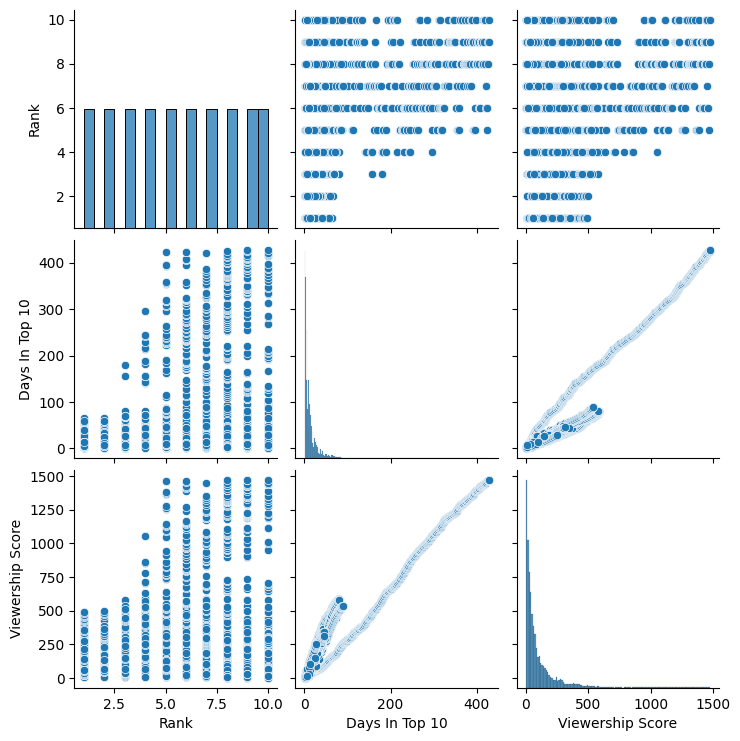

In [23]:
sns.pairplot(netflix)

# Data Cleaning

The column 'Netflix Exclusive' has missing data. It currently only contains values of Yes, so I'll be filling the missing values with 'No'.

In [9]:
netflix.drop_duplicates()

As of  Rank Year to Date Rank Last Week Rank  \
0     2020-04-01     1                 1              1   
1     2020-04-01     2                 2              -   
2     2020-04-01     3                 3              2   
3     2020-04-01     4                 4              -   
4     2020-04-01     5                 5              4   
...          ...   ...               ...            ...   
7095  2022-03-11     6                 5              1   
7096  2022-03-11     7                 7              2   
7097  2022-03-11     8                 8              -   
7098  2022-03-11     9                 9              7   
7099  2022-03-11    10                10              -   

                             Title     Type Netflix Exclusive  \
0     Tiger King: Murder, Mayhem …  TV Show               Yes   
1                            Ozark  TV Show               Yes   
2                     All American  TV Show               NaN   
3                     Blood Father    Movie               NaN   
4                     The Platform    Movie               Yes   
...                            ...      ...               ...   
7095           Worst Roommate Ever  TV Show               Yes   
7096             Vikings: Valhalla  TV Show               Yes   
7097                       Shooter    Movie               NaN   
7098                       Shrek 2    Movie               NaN   
7099                         Shrek    Movie               NaN   

     Netflix Release Date  Days In Top 10  Viewership Score  
0            Mar 20, 2020               9                90  
1            Jul 21, 2017               5                45  
2            Mar 28, 2019               9                76  
3            Mar 26, 2020               5                30  
4            Mar 20, 2020               9                55  
...                   ...             ...               ...  
7095          Mar 1, 2022              10                81  
7096         Feb 25, 2022              14               100  
7097          Aug 1, 2014               3                 7  
7098          Mar 1, 2022              10                33  
7099          May 1, 2018               7                12  

[7100 rows x 10 columns]

### Editing Values

In [11]:
netflix['Year to Date Rank']=netflix['Year to Date Rank'].replace('-',0)
netflix['Last Week Rank']=netflix['Last Week Rank'].replace('-',0)
netflix['Netflix Exclusive']=netflix['Netflix Exclusive'].fillna('NO')

In [38]:
netflix.isnull().sum()

As of                   0
Rank                    0
Year to Date Rank       0
Last Week Rank          0
Title                   0
Type                    0
Netflix Exclusive       0
Netflix Release Date    0
Days In Top 10          0
Viewership Score        0
dtype: int64

### Converting the data type

In [13]:
netflix['Year to Date Rank']=netflix['Year to Date Rank'].astype('int64')
netflix['Last Week Rank']=netflix['Last Week Rank'].astype('int64')
netflix['Netflix Release Date']=pd.to_datetime(netflix['Netflix Release Date'])
netflix['As of']=pd.to_datetime(netflix['As of'])
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   int64         
 3   Last Week Rank        7100 non-null   int64         
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     7100 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(3)
memory usage: 554.8+ KB


# Question Setup

### For this project, I analyzed Netflix Daily Top 10 in the United States during Covid-19 pandemic dataset.The time frame of the data is from 2020-04-01 to 2022-03-11. Here are a few things I wanted to find out:

### Which genre has performed best?
### Which TV shows spent the most time in the Netflix Top 10?
### Which movies spent the most time in the Netflix Top 10?
### Which stand-up comedy specials spent the most time in the Netflix Top 10?
### What was the concert that made the Netflix Top 10?
### What were the Netflix Top Ten Titles?

# Analysis

### Correlations

<AxesSubplot:xlabel='Days In Top 10', ylabel='Viewership Score'>

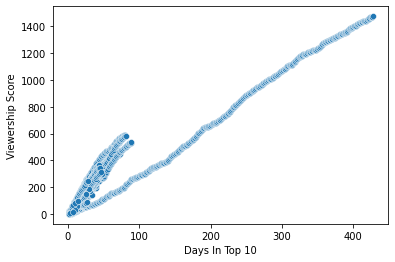

In [16]:
sns.scatterplot(data=netflix, x=netflix['Days In Top 10'], y=netflix['Viewership Score'])

<AxesSubplot:xlabel='Days In Top 10', ylabel='Viewership Score'>

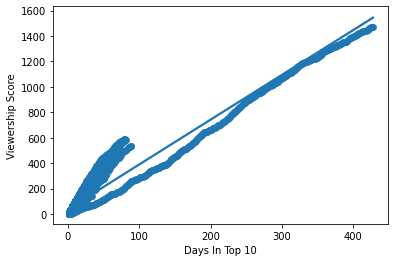

In [17]:
sns.regplot(data=netflix, x=netflix['Days In Top 10'], y=netflix['Viewership Score'])

Seen in the graphs above, there's a correlation between Days In Top 10 and Viewership Score.

In [ ]:
### cheching the score for correlation coefficient.

In [18]:
dd=np.corrcoef(netflix['Viewership Score'],netflix['Days In Top 10'])
dd[1, 0]

0.9624135870948406

### Which genre has performed best?

<AxesSubplot:xlabel='Type', ylabel='count'>

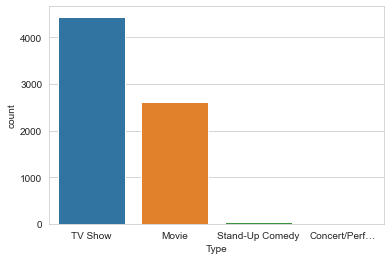

In [19]:
sns.set_style('whitegrid')
sns.countplot(data=netflix,x=netflix['Type'])

TV shows are the leading star here, with movies firmly trailing behind.

### Which TV shows spent the most time in the Netflix Top 10?

In [17]:
tv_shows = netflix[netflix['Type'] == 'TV Show']
tv_shows.groupby(['Title'])['Days In Top 10'].max().sort_values(ascending=False).head(10)

Title
Cocomelon               428
Ozark                    89
Cobra Kai                81
Manifest                 80
The Queenâs Gambit     73
Outer Banks              72
Squid Game               66
All American             66
Bridgerton               58
Lucifer                  57
Name: Days In Top 10, dtype: int64

Cocomelon is definately the shining star here.

### Which movies spent the most time in the Netflix Top 10?

In [13]:
movies = netflix[netflix['Type'] == 'Movie']
movies.groupby(['Title'])['Days In Top 10'].max().sort_values(ascending=False).head(10)

Title
The Mitchells vs. The Machines    31
How the Grinch Stole Christmas    29
Vivo                              29
365 Days                          28
Despicable Me 2                   27
Donât Look Up                   26
The Christmas Chronicles 2        24
Illumination Presents The G…      24
We Can Be Heroes                  24
Red Notice                        23
Name: Days In Top 10, dtype: int64

### Which stand-up comedy specials spent the most time in the Netflix Top 10?

In [12]:
comedy = netflix[netflix['Type'] == 'Stand-Up Comedy']
comedy.groupby(['Title'])['Days In Top 10'].max().sort_values(ascending=False)

Title
Dave Chappelle: The Closer        16
Kevin Hart: Zero F**ks Given      10
George Lopez: Weâll Do It f…     5
Jerry Seinfeld: 23 Hours to…       5
Chris DâElia: No Pain            3
Bo Burnham: Inside                 2
Name: Days In Top 10, dtype: int64

Dave Chappelle and Kevin Hart are the only two comedians to stay in the Netflix Top 10 for ten or more days in the past two years.

### What was the concert that made the Netflix Top 10?

In [11]:
netflix[netflix['Type'] == 'Concert/Perf…']

As of  Rank Year to Date Rank Last Week Rank  \
2651  2020-12-22     2                 -              -   
2664  2020-12-23     5                 2              -   

                             Title           Type Netflix Exclusive  \
2651  Ariana Grande: Excuse Me, I…  Concert/Perf…               Yes   
2664  Ariana Grande: Excuse Me, I…  Concert/Perf…               Yes   

     Netflix Release Date  Days In Top 10  Viewership Score  
2651         Dec 21, 2020               1                 9  
2664         Dec 21, 2020               2                15

December of 2020, Ariana Grande's Excuse Me, I Love You spent two days in the Netflix Top 10.

### What were the Netflix Top Ten Titles?

In [37]:
netflix[netflix['Days In Top 10']=='Yes']
netflix.groupby('Title')['Viewership Score'].max().sort_values(ascending=False)[0:10]

Title
Cocomelon               1474
Manifest                 590
Cobra Kai                582
Ozark                    536
Outer Banks              534
Squid Game               495
The Queenâs Gambit     446
Bridgerton               432
All American             416
Lucifer                  415
Name: Viewership Score, dtype: int64

# Conclusion

There's a high correlation between Viewership Score and Days In Top 10. The top 10 titles are Cocomelon, Manifest, Cobra Kai, Ozark, Outer Banks, Squid Game, The Queens's Gambit,  Bridgeton, All American, and Lucifer. Cocomelon spent 428 days in the Netflix Top 10 over the past two years, with a viewrship score of more than double double than the others at 1474. Children's movies and Netflix Exclusives are the most popular genres to stream on Netflix. 